# Последовательность выполнения заданий:

1. Проверьте качество данных:
    1. Проверьте типы данных колонок и приведите их к нужному типу (например, даты к типу datetime).
    2. Проверьте наличие пропущенных значений и обработайте их (например, заполните по какому-либо принципу или удалите строки с пропущенными значениями).
    3. Проверьте данные на наличие дубликатов, и, если необходимо, вычистите их.

2. Рассчитайте основные статистические показатели для числовых переменных, такие как среднее, медиана и стандартное отклонение. Другие статистические показатели также могут быть рассчитаны в зависимости от конкретных целей и задач анализа данных. Сделайте вывод по результатам.

3. Постройте графики, которые считаете наиболее релевантными для анализа данных. Графики должны быть информативными и помочь вам лучше понять данные. При необходимости введите дополнительные колонки в исходный датафрейм.
После построения графиков проанализируйте полученные результаты и сделайте выводы (например, какие данные имеют наибольшую значимость, какие переменные влияют на результаты). Если это необходимо доработайте с данными на этом этапе.

4. Вычислите матрицу корреляции и постройте heatmap для нее. Сделайте выводы о взаимосвязях, обнаруженных в данных.

5. Сделайте общий вывод по исследуемому датасету. Предложите возможные способы применения полученных результатов анализа данных.

## Датасет "Список лэптопов с параметрами для выбора"

**Контекст:**

В современную цифровую эпоху ноутбуки стали важным инструментом для работы, образования и развлечений. На рынке представлено так много вариантов, что выбрать ноутбук, соответствующий вашим потребностям, может быть непросто. Flipkart, один из крупнейших в Индии веб-сайтов электронной коммерции, предлагает широкий выбор ноутбуков различных марок и ценовых категорий.

**Цель:** 

мы хотим выпустить ноутбук, но для этого нужно понимать оптимальные параметры для него. Следовательно, основываясь на пользовательском рейтинге, нам нужно выбрать оптимальную ОС, размер хранилища и т. п.

**Гипотеза:** 

если мы выпустим ноутбук с наиболее востребованными характеристиками, то он будет лучше продаваться.
***


### 1. Обзор и проверка качества данных

**Описание:**
Этот набор данных содержит информацию о 1000 ноутбуках, доступных на индийском сайте электронной коммерции Flipkart. 

Данные включают технические характеристики, такие как:
* тип процессора - processor
* размер оперативной памяти - ram
* емкость жесткого диска - storage
* размер и разрешение экрана - display(in inch)
* операционную систему - os
* рейтинги и отзывы клиентов - rating
* информацию о ценах - price(in Rs.)

Чтобы проверить целевую гипотезу, обозначим признак количество рейтингов (Y), как критерий популярности и результат потребительского спроса. Технические параметры ноутбуков и ценовой диапазон будут факторными признаками (Х).


In [1]:
# импортируем необходимые библиотеки, сам датасет и сделаем копию
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('laptops.csv')
df = data.copy()

In [2]:
# сделаем обзор данных
df.head()

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0


### Задание 1.1. 

In [3]:
# сделаем обзор типов признаков и количество строк
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    object 
 6   os                984 non-null    object 
 7   storage           984 non-null    object 
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 92.4+ KB


#### Выводы: 
Датасет содержит в себе 12 признаков. Максимальное количество строк 984. 

Все типы данных в датасете определены корректно. Преобразование типов не требуется.
***

### Задание 1.2. 

In [4]:
# посчитаем количество пропущенных данных и в каких они столбцах
df.isnull().sum()

Unnamed: 0            0
img_link              0
name                  0
price(in Rs.)         0
processor             0
ram                   0
os                    0
storage               0
display(in inch)      0
rating              296
no_of_ratings       296
no_of_reviews       296
dtype: int64

#### Выводы: 
Датасет содержит 296 строк пропущенных данных в столбцах с рейтингом, количеством рейтингов и отзывов покупателей. Поскольку доля строк с пропусками составляет около 30%, то заменим их на средние значения в зависимости от бренда, размера оперативной памяти и емкости жесткого диска. Для этого сделаем следующие преобразования датасета.

In [5]:
# добавим новый признак с названием бренда
df['brand_name'] = df['name'].apply(lambda x: x.split()[0].lower())

In [6]:
# добавим новые признаки с типом и размером оперативной памяти
df['ram_size'] = df['ram'].apply(lambda x: int(x.split()[0]))
df['ram_type'] = df['ram'].apply(lambda x: x.split('GB')[1][:-4])

In [7]:
# добавим новые признаки с количеством жестких дисков, наличием диска типа SSD и общей емкостью жестких дисков

# исключим 2 строки некорректных данных в признаке storage через ограничение длины строки
df = df[df['storage'].apply(lambda x: len(str(x)) < 30)]

# добавим поле с количеством жестких дисков
df['storage_count'] = df['storage'].apply(lambda x: 2 if '|' in x else 1)

# добавим поле с наличием диска SSD
df['storage_SSD'] = df['storage'].apply(lambda x: 1 if 'SSD' in x else 0)

# добавим поле с размером общей памяти через сплитование признака, конвертации TB и GD и суммирование размера двух жестких дисков
df['storage_A'], df['storage_B'] = df['storage'].str.split('|', n=1).str
df['storage_B'].replace(np.nan, 0, inplace=True)
size_A = df['storage_A'].apply(lambda x: int(x.split()[0]) if 'GB' in x else int(x.split()[0]) * 1024)
size_B = df['storage_B'].apply(lambda x: int(str(x).split()[0]) if ('GB' in str(x)) and (x is not np.nan) else 0)
df['storage_size'] = size_A + size_B

/var/folders/mn/dbx4zk2j6jn7r75_nv1cm6980000gq/T/ipykernel_95615/2655264381.py:13: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['storage_A'], df['storage_B'] = df['storage'].str.split('|', n=1).str


In [8]:
# уберем лишнюю информацию из признака "Операционная система"
df['os'] = df['os'].apply(lambda x: x.split('bit ')[1] if 'bit' in x else x)
df['os'] = df['os'].str.replace('Operating System', '')

In [9]:
# разделим признак processor на бренд, модель и поколение, чтобы лучше понять 
# влияение процессора на потребительский спрос и цену
df['proc_name'], df['proc_model'] = df['processor'].str.split(' ', n=1).str
df['proc_model_name'], df['proc_model_gen'] = df['proc_model'].str.split(' Processor', n=1).str
df['proc_model_gen'].replace(np.nan, 0, inplace=True)

/var/folders/mn/dbx4zk2j6jn7r75_nv1cm6980000gq/T/ipykernel_95615/1273577164.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['proc_name'], df['proc_model'] = df['processor'].str.split(' ', n=1).str
/var/folders/mn/dbx4zk2j6jn7r75_nv1cm6980000gq/T/ipykernel_95615/1273577164.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['proc_model_name'], df['proc_model_gen'] = df['proc_model'].str.split(' Processor', n=1).str


In [10]:
df.head(3)

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,...,ram_type,storage_count,storage_SSD,storage_A,storage_B,storage_size,proc_name,proc_model,proc_model_name,proc_model_gen
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11,512 GB SSD,15.6,4.5,...,DDR4,1,1,512 GB SSD,0,512,Intel,Core i5 Processor (11th Gen),Core i5,(11th Gen)
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 11,1 TB HDD|256 GB SSD,15.6,4.4,...,DDR4,2,1,1 TB HDD,256 GB SSD,1280,Intel,Core i3 Processor (11th Gen),Core i3,(11th Gen)
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11,512 GB SSD,15.6,4.4,...,DDR4,1,1,512 GB SSD,0,512,Intel,Core i5 Processor (10th Gen),Core i5,(10th Gen)


#### Выводы: 
Датасет содержит некоторые дублирующиеся или не актуальные признаки ('storage', 'storage_A', 'storage_B', 'ram', 'img_link', 'Unnamed: 0', 'no_of_reviews'), которые удалим на следующем этапе. 
***

### Задание 1.3.

In [11]:
# удалим лишние и дублирующие признаки
df.drop(columns=['storage', 'storage_A', 'storage_B', 'ram', 'name', 'img_link', 'Unnamed: 0', 'no_of_reviews', 'processor', 'proc_model'], inplace=True)
# df_log
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 983
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price(in Rs.)     767 non-null    int64  
 1   os                767 non-null    object 
 2   display(in inch)  767 non-null    float64
 3   rating            511 non-null    float64
 4   no_of_ratings     511 non-null    float64
 5   brand_name        767 non-null    object 
 6   ram_size          767 non-null    int64  
 7   ram_type          767 non-null    object 
 8   storage_count     767 non-null    int64  
 9   storage_SSD       767 non-null    int64  
 10  storage_size      767 non-null    int64  
 11  proc_name         767 non-null    object 
 12  proc_model_name   767 non-null    object 
 13  proc_model_gen    767 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 89.9+ KB


#### Выводы: 
Выяснилось, что датасет содержал 217 задублированных строк, которые были удалены. Также 10 неактуальных признаков.

In [13]:
# заполним пустые значения у признака 'rating' с помощью средних значений у аналогичных моделей
# в зависимости от бренда, размера операционной памяти и емкости жесткого диска
df['rating'] = df['rating'].fillna(df.groupby(['brand_name', 'ram_size', 'storage_SSD'])['rating'].transform('mean'))
df['rating'] = df['rating'].fillna(df['rating'].mean())

# заполним пустые значения у признака 'no_of_ratings' с помощью средних значений, так как
# отсутствие данных скорее всего означает не большую популярность
df['no_of_ratings'] = df['no_of_ratings'].fillna(df['no_of_ratings'].mean())

In [14]:
df['rating'].isna().sum()

0

#### Выводы: 
Датасет имел 258 строк с пропусками данных у признаков "rating" и "no_of_ratings". Они были заполнены средними значениями в зависимости названия бренда, размера оперативной памяти и емкости жеских дисков. В 16 случаях, когда не удалось подобрать релеватных групп, пропуски заполнены средними значениями признака по всем данным.
***

### Задание 2 & 3. 

In [15]:
df.describe()

,price(in Rs.),display(in inch),rating,no_of_ratings,ram_size,storage_count,storage_SSD,storage_size
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.00000
mean,88415.462842,15.136375,4.290420,633.982387,11.911343,1.061278,0.955671,674.54498
std,61208.878124,1.453367,0.314019,1332.433601,6.067717,0.239996,0.205958,364.54484
min,15990.000000,11.600000,1.600000,1.000000,4.000000,1.000000,0.000000,128.00000
25%,46990.000000,14.000000,4.124490,32.500000,8.000000,1.000000,1.000000,512.00000
50%,68180.000000,15.600000,4.300000,413.000000,8.000000,1.000000,1.000000,512.00000
75%,107510.500000,15.600000,4.405357,633.982387,16.000000,1.000000,1.000000,1024.00000
max,419990.000000,35.000000,5.000000,15492.000000,32.000000,2.000000,1.000000,4096.00000


In [16]:
# В описательной статистике была обнаружена ошибка в признаке размера дисплея (мах значение 35), 
# что на самом деле означает 35 см вместо 14 дюймов.
df[df['display(in inch)'] > 18]

,price(in Rs.),os,display(in inch),rating,no_of_ratings,brand_name,ram_size,ram_type,storage_count,storage_SSD,storage_size,proc_name,proc_model_name,proc_model_gen
594,63090,Windows 10,35.0,3.9,89.0,dell,8,DDR4,1,1,512,Intel,Core i5,(11th Gen)
861,43090,Windows 11,35.0,4.2,33.0,dell,4,DDR4,2,1,1280,Intel,Core i3,(11th Gen)


In [17]:
# заменим ошибочные значения 35 на корректные 14
df['display(in inch)'].replace(35, 14, inplace=True)

In [18]:
# для простоты оценки изменим тип данных у количества рейтингов с float64 на int64.
df['no_of_ratings'] = df['no_of_ratings'].astype('int64')

In [19]:
df.describe()

,price(in Rs.),display(in inch),rating,no_of_ratings,ram_size,storage_count,storage_SSD,storage_size
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.00000
mean,88415.462842,15.081617,4.290420,633.654498,11.911343,1.061278,0.955671,674.54498
std,61208.878124,1.040410,0.314019,1332.433682,6.067717,0.239996,0.205958,364.54484
min,15990.000000,11.600000,1.600000,1.000000,4.000000,1.000000,0.000000,128.00000
25%,46990.000000,14.000000,4.124490,32.500000,8.000000,1.000000,1.000000,512.00000
50%,68180.000000,15.600000,4.300000,413.000000,8.000000,1.000000,1.000000,512.00000
75%,107510.500000,15.600000,4.405357,633.000000,16.000000,1.000000,1.000000,1024.00000
max,419990.000000,17.300000,5.000000,15492.000000,32.000000,2.000000,1.000000,4096.00000


#### Выводы: 
1. Описательная статистика датасета показывает, что есть сильные выбросы по цене, рейтингу (значит есть модели, которые сильно популярны). По размеру дисплея выявлена ошибка данных (см.ниже).
2. Имеется сильное отклонение между средней (88615) и медианной (68235) ценой, о чем также подтверждает высокое средне квадратическое отклонение (61238). Это связанано также с брендом и особенностями ноутбуков (например, материал корпуска и премиальные фичи, которые не учтены в датасете)
3. Наиболее часто продаваемые модели имеют следующие характеристики:
    - размер дисплея 15,6 дюймов
    - размер оперативной памяти 8 GB
    - один жесткий диск типа SSD и емкостью 512 GB

In [20]:
# создадим функцию для построения графика рассеивания, который визуализирует количество рейтингов и
# их средние значения в зависимости от категориальных признаков

def feature_plot(feature, data=df, x='rating', y='no_of_ratings'):
    feature_means = data.groupby(feature)[x].mean()
    feature_no_ratings = data.groupby(feature)[y].sum()
    feature_plot = sns.scatterplot(x=feature_means, y=feature_no_ratings)

    for i in range(feature_means.shape[0]):
        feature_plot.text(feature_means[i]+0.01, feature_no_ratings[i],
        feature_means.index[i], horizontalalignment='left',
        size='medium', color='black')

    feature_max_no_rating = feature_no_ratings.max()
    best_feature_name = feature_means[feature_no_ratings == feature_max_no_rating].index[0]
    feature_rating = feature_means[feature_no_ratings == feature_max_no_rating][0].round(2)
    print(f'Number of ratings of {best_feature_name} is {feature_max_no_rating}, average rating is {feature_rating}')

Number of ratings of asus is 135315, average rating is 4.35


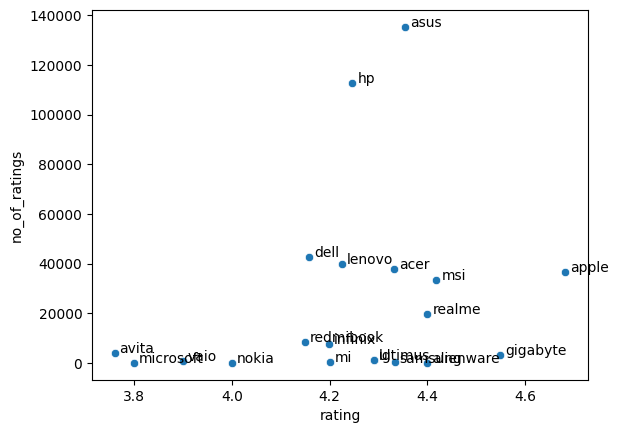

In [21]:
feature_plot('brand_name')

In [22]:
round(df.groupby('brand_name')['rating'].mean().loc['hp'], 2)

4.25

In [23]:
df.groupby('brand_name')['no_of_ratings'].sum().loc['hp']

112854

#### Вывод: 

**Целевая конфигурация ноутбука должна иметь качество, дизайн и функционал, похожие на Asus или HP, поскольку эти самые востребованные бренды ноутбуков (125K+ и 112К отзывов) с рейтингом (4.35 и 4.25) выше среднего (4.29) и медианного (4.3).**


Number of ratings of Intel is 288910, average rating is 4.24


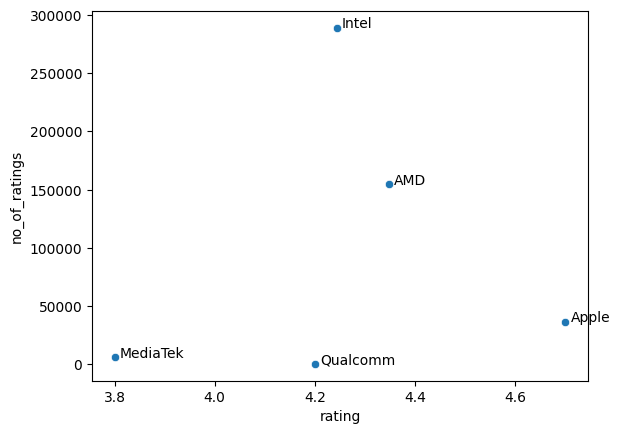

In [24]:
feature_plot('proc_name')

#### Вывод: 

**Целевая конфигурация ноутбука должна иметь процессор Intel, поскольку это самый востребованный процессор (271K+ отзывов) с рейтингом (4.24) близко к среднему (4.29) и медианному (4.3). Рейтинг у ближайшего конкурентов AMD выше незначительно (4.35), но спрос почти в 2 раза ниже.**

Number of ratings of Core i5 is 117401, average rating is 4.24


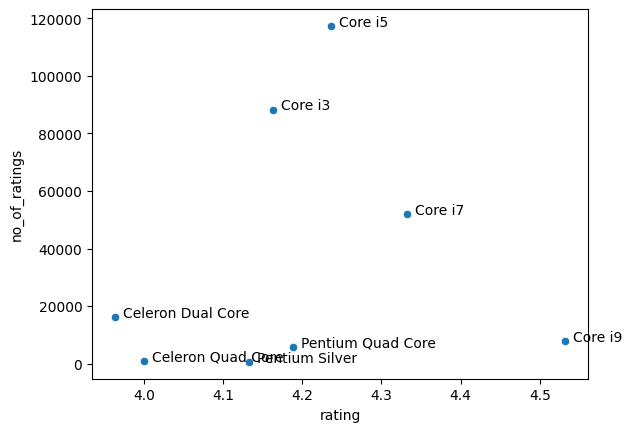

In [25]:
proc_df = df[df['proc_name'] == 'Intel']
feature_plot('proc_model_name', data=proc_df)

#### Вывод: 

**Целевая конфигурация ноутбука должна иметь процессор Intel модель Core i5 или лучше (Core i7, Core i9 с более высокими рейтингами), поскольку это самая востребованная модель процессора Intel (107K+ отзывов) с рейтингом (4.24) близко к среднему (4.29) и медианному (4.3).**

Number of ratings of  (12th Gen) is 34882, average rating is 4.27


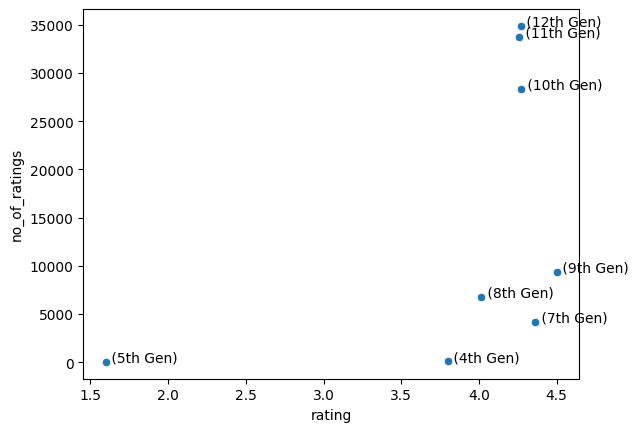

In [26]:
gen_df = df[(df['proc_name'] == 'Intel') & (df['proc_model_name'] == 'Core i5')]
feature_plot('proc_model_gen', data=gen_df)

#### Вывод:

**Целевая конфигурация ноутбука должна иметь процессор Intel Core i5 10-го поколения или новее (11, 12), поскольку они самые востребованные поколения процессора (32K+ отзывов) с рейтингом (4.26) близко к среднему (4.29) и медианному (4.3).**

Number of ratings of Windows 11  is 266523, average rating is 4.3


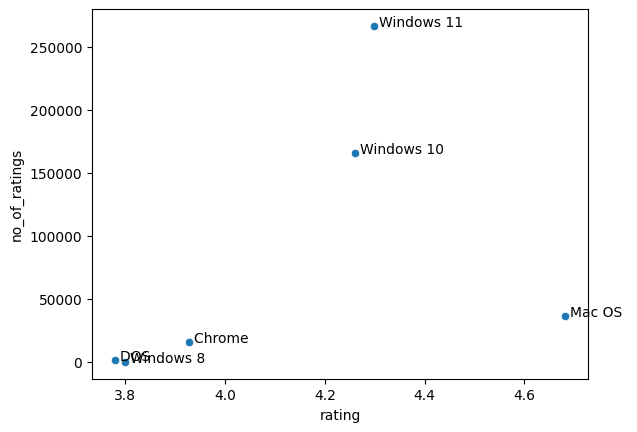

In [27]:
feature_plot('os')

#### Вывод:

**На целевой конфигурации ноутбука должна быть установлена операционная система Windows 11 (или 10), поскольку она самая востребованная версия операционной системы (250K+ отзывов) с рейтингом (4.3) равен среднему (4.29) и медианному (4.3).**

### Задание 4. 

In [28]:
df.corr().round(2)

/var/folders/mn/dbx4zk2j6jn7r75_nv1cm6980000gq/T/ipykernel_95615/1524431984.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().round(2)


,price(in Rs.),display(in inch),rating,no_of_ratings,ram_size,storage_count,storage_SSD,storage_size
price(in Rs.),1.00,0.18,0.34,-0.08,0.76,-0.08,0.14,0.53
display(in inch),0.18,1.00,0.07,-0.05,0.21,0.04,0.03,0.22
rating,0.34,0.07,1.00,0.05,0.34,-0.06,0.29,0.05
no_of_ratings,-0.08,-0.05,0.05,1.00,-0.11,-0.01,-0.09,-0.03
ram_size,0.76,0.21,0.34,-0.11,1.00,-0.10,0.18,0.42
storage_count,-0.08,0.04,-0.06,-0.01,-0.10,1.00,0.06,0.40
storage_SSD,0.14,0.03,0.29,-0.09,0.18,0.06,1.00,-0.21
storage_size,0.53,0.22,0.05,-0.03,0.42,0.40,-0.21,1.00


/var/folders/mn/dbx4zk2j6jn7r75_nv1cm6980000gq/T/ipykernel_95615/2835802517.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

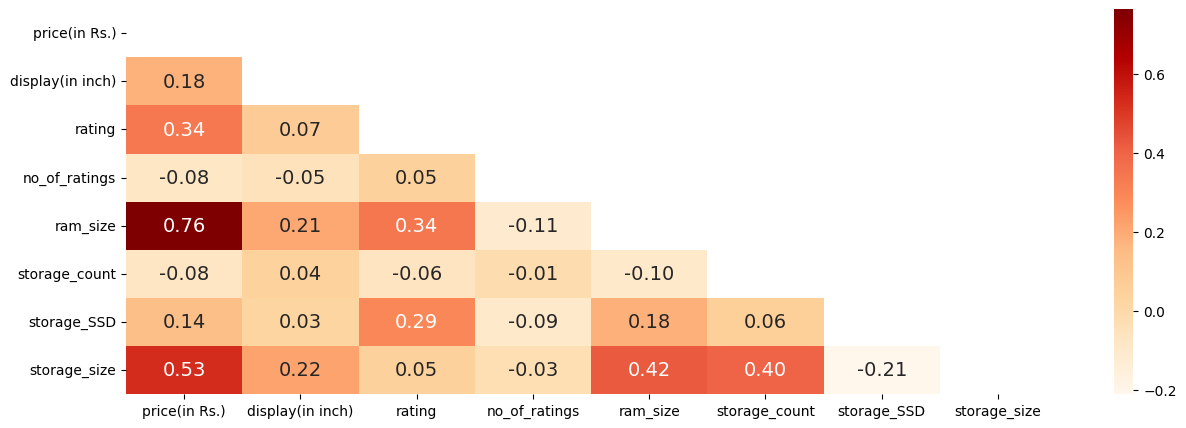

In [49]:
fig, ax = plt.subplots(figsize=(15,5))
df_corr = df.corr()
sns.heatmap(df_corr, cmap="OrRd", annot=True, fmt='.2f', annot_kws={'size': 14}, mask=np.triu(df_corr))

#### Вывод:

На heatmap мы видим, что существуют более сильные связи между:
1. объемом оперативной памяти и ценой (0.76), что очевидно
2. емкостью жесткого диска и ценой (0.53), что очевидно
3. емкостью жесткого диска с количеством дисков и емкостью памяти (0.40, 0.42)
4. рейтинги зависят относительно слабо от размера операционной памяти (0.34) и SSD диска (0.29).

Остальные взаимосвязи выражены слабо, особенн околичество рейтингов. Была также произведена оценка корреляции с категориальными признаками через функцию get_dummies, но ничего явного и важного не было выявлено.

<Axes: xlabel='price(in Rs.)', ylabel='no_of_ratings'>

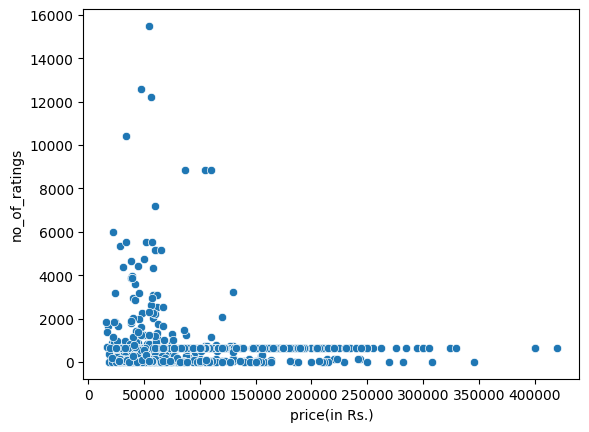

In [31]:
sns.scatterplot(df, x='price(in Rs.)', y='no_of_ratings')

#### Вывод:

На граффике рассеяния мы видим, что есть несколько сильно популярных моделей с количеством пользовательских оценок. Рассмотрим их далее, чтобы понять причины их популярности.  

In [52]:
df[df['no_of_ratings'] >= 10000].head().sort_values(by='no_of_ratings', ascending=False)

,price(in Rs.),os,display(in inch),rating,no_of_ratings,brand_name,ram_size,ram_type,storage_count,storage_SSD,storage_size,proc_name,proc_model_name,proc_model_gen
269,54990,Windows 10,15.6,4.2,15492,hp,8,DDR4,1,0,1024,AMD,Ryzen 5 Quad Core,
15,46990,Windows 10,14.0,4.4,12584,realme,8,DDR4,1,1,256,Intel,Core i3,(11th Gen)
667,56000,Windows 10,15.6,4.4,12223,hp,8,DDR4,1,1,512,AMD,Ryzen 5 Hexa Core,
3,33990,Windows 11,15.6,4.3,10406,asus,8,DDR4,1,1,512,Intel,Core i3,(10th Gen)


#### Вывод:

1. Модели от НР выделяются тем, что они относятся к категории игровых ноутбуков. Поэтому их дизайн и мощная видеокарта сфокусированы на высокую производительность компьютерных игр.
2. Популяронсть ноутбука Realme вызвана дизайном (аллюминиевый плоский корпус) и экраной высокого качества изображения (IPS-матрица с разрешением 2К)

### Задание 5. 

**В результате анализа датасета мы подтвердили гипотезу, что если мы выпустим ноутбук с наиболее востребованными характеристиками, то он будет лучше продаваться. Продажи оценивались через количество рейтингов и удовлетворенностью пользователей посредством средних оценок**

**Есть две стратегии достижения цели:**
1. **выпустить ноутбук с оптимальными параметрами, который будет ориентирован на массового пользователя и максимально закроет их потребности. Такой ноутбука должен иметь:**
```
    - размер дисплея 15,6 дюймов
    - размер оперативной памяти 8 GB
    - один жесткий диск типа SSD емкостью 512 GB
    - качество, дизайн и функционал, как у ноутбуков Asus
    - процессор Intel Core i5 10-го поколения или лучше (Core i7, Core i9 поколений 11 или 12)
    - установлена операционная система Windows 11 (или 10) 
```
2. **выпускить ноутбук, который будет нацелен на одну из целевых аудиторий: геймеры или бизнес-люди. Для них целевой ноутбук должен обладать дизайном и техническими параметрами, копирующие модели конкурентов, лидеров этих сегментов: HP Pavillion Gaming, Realme Slim Book. При этом наш ноутбук должен иметь заметно более полезные свойства и более производительные мощности.**